# Maze training

## Imports

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch.nn as nn
import torch.optim as optim

In [2]:
# To reload the module
%load_ext autoreload
%autoreload 2
sys.path.append('../')
from maze.maze_class import Qmaze, show, play_game, play_stoch_game, print_stoch_policy
from maze.rl_methods import qtrain, qtrain_change_maze
from maze.drl_methods import moment_2_TD_learning, online_categorical_TD_learning
from src.utils import fix_seeds
from src.network import Net

In [3]:
# Constantes
LEFT = 0
UP = 1
RIGHT = 2
DOWN = 3

# Actions dictionary
actions_dict = {
    LEFT: 'left',
    UP: 'up',
    RIGHT: 'right',
    DOWN: 'down',
}

num_actions = 4

## First configuration

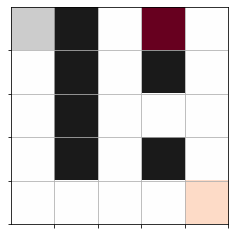

In [28]:
# Configuration where the risky strategy is optimal
maze1 = np.array([[1.,0.,1.,-1.,1.],
                 [1.,0.,1.,0.,1.],
                 [1.,0.,1.,1.,1.],
                 [1.,0.,1.,0.,1.],
                 [1.,1.,1.,1.,1.]])
qmaze1 = Qmaze(maze=maze1, random_init=False, door_mode=False)
show(qmaze1)

Epoch: 000/29 | Loss: 0.0000 | Episodes: 1 | Win count: 1 | Win rate: 0.000 | time: 0.0 seconds
Epoch: 001/29 | Loss: 0.0000 | Episodes: 1 | Win count: 2 | Win rate: 0.000 | time: 0.0 seconds
Epoch: 002/29 | Loss: 0.0000 | Episodes: 26 | Win count: 2 | Win rate: 0.000 | time: 0.1 seconds
Epoch: 003/29 | Loss: 5.6469 | Episodes: 27 | Win count: 2 | Win rate: 0.000 | time: 0.8 seconds
Epoch: 004/29 | Loss: 2.5264 | Episodes: 12 | Win count: 3 | Win rate: 0.000 | time: 1.1 seconds
Epoch: 005/29 | Loss: 0.1755 | Episodes: 1 | Win count: 4 | Win rate: 0.000 | time: 1.1 seconds
Epoch: 006/29 | Loss: 1.2456 | Episodes: 10 | Win count: 5 | Win rate: 0.000 | time: 1.4 seconds
Epoch: 007/29 | Loss: 5.3011 | Episodes: 30 | Win count: 5 | Win rate: 0.000 | time: 2.2 seconds
Epoch: 008/29 | Loss: 5.0041 | Episodes: 43 | Win count: 5 | Win rate: 0.000 | time: 3.3 seconds
Epoch: 009/29 | Loss: 0.1069 | Episodes: 1 | Win count: 6 | Win rate: 0.000 | time: 3.3 seconds
Epoch: 010/29 | Loss: 0.0807 | Epi

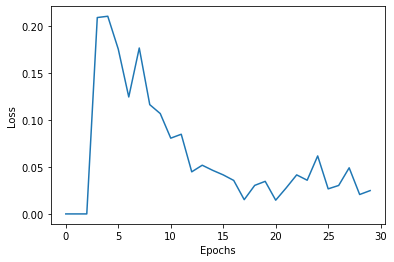

Vizualisation of the trained policy


[['↓', '#', '↓', '←', '↓'],
 ['↓', '#', '↓', '#', '↓'],
 ['↓', '#', '↓', '→', '↓'],
 ['↓', '#', '↓', '#', '↓'],
 ['→', '→', '→', '→', 'G']]

In [39]:
loss_n = nn.MSELoss()
n_epoch = 30
fix_seeds()
model1 = Net(maze1.size, num_actions)
optimizer = optim.Adam(model1.parameters())

tab_loss, tab_cumulative_reward, tab_win = qtrain(model1, qmaze1, optimizer, loss_n, n_epoch=n_epoch, max_memory=8*maze1.size, n_epoch_fit=8, 
                    name='model_parameters_config_1', eps_decay=0.95, eps_start=0.9)

plt.plot(tab_loss)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

print("Vizualisation of the trained policy")
print_stoch_policy(model1, qmaze1) # to check the training went well

## Second configuration

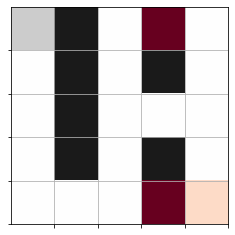

In [6]:
# Configuration where the safe strategy is optimal
maze2 = np.array([[1.,0.,1.,-1.,1.],
                 [1.,0.,1.,0.,1.],
                 [1.,0.,1.,1.,1.],
                 [1.,0.,1.,0.,1.],
                 [1.,1.,1.,-1.,1.]])
qmaze2 = Qmaze(maze=maze2, random_init=False, door_mode=True, prob_door_close=1.)
show(qmaze2)

Epoch: 000/29 | Loss: 0.0000 | Episodes: 1 | Win count: 1 | Win rate: 0.000 | time: 0.0 seconds
Epoch: 001/29 | Loss: 0.0000 | Episodes: 27 | Win count: 1 | Win rate: 0.000 | time: 0.0 seconds
Epoch: 002/29 | Loss: 1.9585 | Episodes: 12 | Win count: 2 | Win rate: 0.000 | time: 0.3 seconds
Epoch: 003/29 | Loss: 3.0403 | Episodes: 25 | Win count: 2 | Win rate: 0.000 | time: 1.2 seconds
Epoch: 004/29 | Loss: 3.7090 | Episodes: 27 | Win count: 3 | Win rate: 0.000 | time: 2.1 seconds
Epoch: 005/29 | Loss: 0.5231 | Episodes: 4 | Win count: 4 | Win rate: 0.000 | time: 2.2 seconds
Epoch: 006/29 | Loss: 3.8300 | Episodes: 37 | Win count: 4 | Win rate: 0.000 | time: 3.5 seconds
Epoch: 007/29 | Loss: 0.1177 | Episodes: 1 | Win count: 5 | Win rate: 0.000 | time: 3.6 seconds
Epoch: 008/29 | Loss: 0.2361 | Episodes: 3 | Win count: 6 | Win rate: 0.000 | time: 3.6 seconds
Epoch: 009/29 | Loss: 3.5029 | Episodes: 43 | Win count: 6 | Win rate: 0.000 | time: 4.6 seconds
Epoch: 010/29 | Loss: 3.9475 | Epi

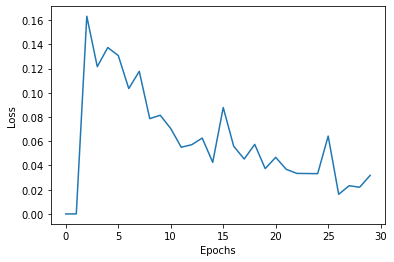

Vizualisation of the trained policy


[['↓', '#', '↓', '↓', '↓'],
 ['↓', '#', '↑', '#', '↓'],
 ['↓', '#', '→', '→', '↓'],
 ['↓', '#', '↑', '#', '↓'],
 ['→', '→', '↑', '→', 'G']]

In [7]:
n_epoch = 30
loss_n = nn.MSELoss()
fix_seeds()
model2 = Net(maze2.size, num_actions)
optimizer = optim.Adam(model2.parameters())
tab_loss, tab_cumulative_reward, tab_win = qtrain(model2, qmaze2, optimizer, loss_n, n_epoch=n_epoch, max_memory=8*maze2.size, n_epoch_fit=8, 
                    name='model_parameters_config_2', eps_decay=0.95)

plt.plot(tab_loss)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()


print("Vizualisation of the trained policy")
print_stoch_policy(model2, qmaze2) # to check the training went well

## Random configuration

Here the special cells ( in red : (4,3) and (0,3) ) are closed with probability $p$.
The risky strategy is optimal for $p \leq p_{lim} \overset{~}{=} 0.18$ and the safe one is optimal for $p \geq p_{lim}$ 

We begin by training a model in the case $p \leq p_{lim}$

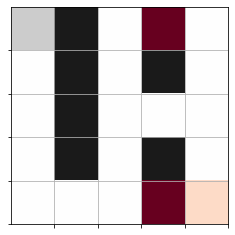

In [4]:
maze3 = np.array([[1.,0.,1.,-1.,1.],
                 [1.,0.,1.,0.,1.],
                 [1.,0.,1.,1.,1.],
                 [1.,0.,1.,0.,1.],
                 [1.,1.,1.,-1.,1.]])
p=0.1
qmaze3 = Qmaze(maze=maze3, random_init=False, door_mode=True, prob_door_close=p) 
show(qmaze3)

Epoch: 000/199 | Loss: 0.0000 | Episodes: 1 | Win count: 1 | Win rate: 0.000 | time: 0.0 seconds
Epoch: 001/199 | Loss: 4.8624 | Episodes: 39 | Win count: 1 | Win rate: 0.000 | time: 1.2 seconds
Epoch: 002/199 | Loss: 6.3371 | Episodes: 34 | Win count: 2 | Win rate: 0.000 | time: 3.6 seconds
Epoch: 003/199 | Loss: 6.3319 | Episodes: 45 | Win count: 2 | Win rate: 0.000 | time: 5.3 seconds
Epoch: 004/199 | Loss: 4.8044 | Episodes: 43 | Win count: 2 | Win rate: 0.000 | time: 8.1 seconds
Epoch: 005/199 | Loss: 1.5841 | Episodes: 12 | Win count: 3 | Win rate: 0.000 | time: 9.0 seconds
Epoch: 006/199 | Loss: 3.6078 | Episodes: 38 | Win count: 4 | Win rate: 0.000 | time: 12.7 seconds
Epoch: 007/199 | Loss: 1.5211 | Episodes: 15 | Win count: 5 | Win rate: 0.000 | time: 13.3 seconds
Epoch: 008/199 | Loss: 0.7011 | Episodes: 9 | Win count: 6 | Win rate: 0.000 | time: 13.7 seconds
Epoch: 009/199 | Loss: 1.1614 | Episodes: 15 | Win count: 7 | Win rate: 0.000 | time: 14.6 seconds
Epoch: 010/199 | L

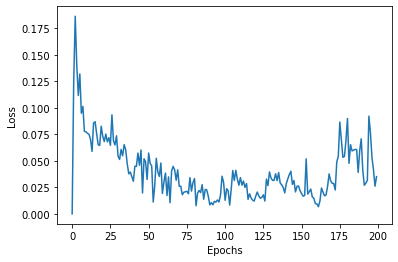

Vizualisation of the trained policy


[['↓', '#', '↓', '→', '↓'],
 ['↓', '#', '↓', '#', '↓'],
 ['↓', '#', '→', '→', '↓'],
 ['↓', '#', '↓', '#', '↓'],
 ['→', '→', '→', '→', 'G']]

In [5]:
loss_n = nn.MSELoss()
nb_epochs = 200

fix_seeds()
model3 = Net(maze3.size, num_actions)
optimizer = optim.Adam(model3.parameters())
tab_loss, tab_cumulative_reward, tab_win = qtrain(model3, qmaze3, optimizer, loss_n, n_epoch=nb_epochs, max_memory=8*maze3.size, n_epoch_fit=8, 
                    name='model_parameters_config_3', eps_decay=0.99, eps_start=0.9)

plt.plot(tab_loss)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

print("Vizualisation of the trained policy")
print_stoch_policy(model3, qmaze3) # to check the training went well

We can then vizualise the distribution of returns for each strategy

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

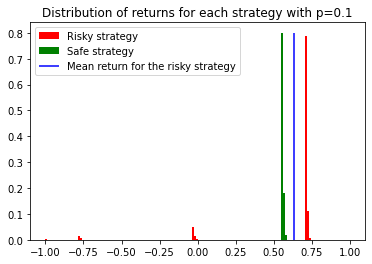

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

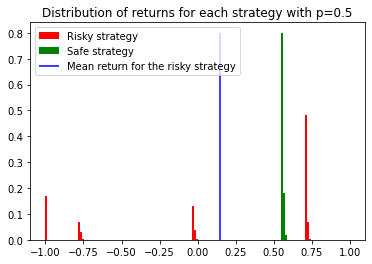

In [58]:
m=150
V_min = -1
V_max = 1.

p=0.1
qmaze3 = Qmaze(maze=maze3, random_init=False, door_mode=True, prob_door_close=p) 

P_risky = online_categorical_TD_learning(model3, m, V_min, V_max, qmaze3, n_episode=1000)
P_start_risky = P_risky[:,0,0]

P_safe = online_categorical_TD_learning(model2, m, V_min, V_max, qmaze3, n_episode=10000)
P_start_safe = P_safe[:,0,0]

theta = np.linspace(V_min, V_max, m)
m_risky = np.sum(P_start_risky*theta)
m_safe = np.sum(P_start_safe*theta)

plt.hist(np.linspace(V_min, V_max, m), weights=P_start_risky, bins=m, label='Risky strategy', color="r")
plt.vlines(m_risky,0,0.8, label='Mean return for the risky strategy', color='b')
plt.hist(np.linspace(V_min, V_max, m), weights=P_start_safe, bins=m, label="Safe strategy", color="g")

plt.legend(loc='upper left')
plt.title("Distribution of returns for each strategy with p="+str(p))
plt.show()

p=0.5
qmaze3 = Qmaze(maze=maze3, random_init=False, door_mode=True, prob_door_close=p) 

P_risky = online_categorical_TD_learning(model3, m, V_min, V_max, qmaze3, n_episode=1000)
P_start_risky = P_risky[:,0,0]

P_safe = online_categorical_TD_learning(model2, m, V_min, V_max, qmaze3, n_episode=10000)
P_start_safe = P_safe[:,0,0]

theta = np.linspace(V_min, V_max, m)
m_risky = np.sum(P_start_risky*theta)
m_safe = np.sum(P_start_safe*theta)

plt.hist(np.linspace(V_min, V_max, m), weights=P_start_risky, bins=m, label='Risky strategy', color="r")
plt.vlines(m_risky,0,0.8, label='Mean return for the risky strategy', color='b')
plt.hist(np.linspace(V_min, V_max, m), weights=P_start_safe, bins=m, label="Safe strategy", color="g")

plt.legend(loc='upper left')
plt.title("Distribution of returns for each strategy with p="+str(p))
plt.show()

Finally, we can evaluate the mean-variance risk measure of each strategy for different penalization. 

The mean-variance risk-measure is defined, for a random variable $X$, as : $\rho_{MV,\lambda} = \mathbb{E}[X] - \lambda \mathbb{V}[X]$

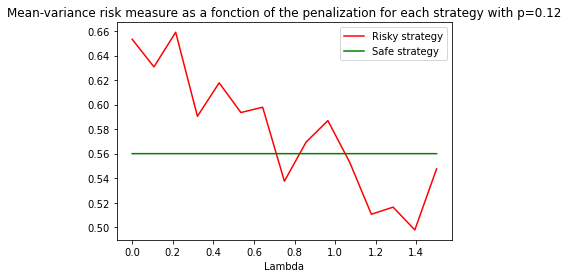

In [11]:
p=0.12
qmaze3 = Qmaze(maze=maze3, random_init=False, door_mode=True, prob_door_close=p) 

mean_var_risky = []
mean_var_safe = []
tab_lambd = np.linspace(0,1.5,15)
for lambd in tab_lambd:
    mv=[]
    for _ in range(15):
        M_risky = moment_2_TD_learning(model3, qmaze3, n_episode=10000)
        mv.append(M_risky[1,0,0] - lambd*(M_risky[2,0,0] - M_risky[1,0,0]**2))
    mean_var_risky.append(np.mean(mv))
    
    M_safe = moment_2_TD_learning(model2, qmaze3, n_episode=100)
    mean_var_safe.append(M_safe[1,0,0] - lambd*(M_safe[2,0,0] - M_safe[1,0,0]**2))

plt.plot(tab_lambd, mean_var_risky, label='Risky strategy', color="r")
plt.plot(tab_lambd, mean_var_safe, label='Safe strategy', color="g")
plt.legend()
plt.title("Mean-variance risk measure as a fonction of the penalization for each strategy with p="+str(p))
plt.xlabel("Lambda")
plt.show()
